# Topic 5: Unsupervised Learning | Gaussian Mixture 
Unsupervised Learning is learning about structures in provided Data. In this notebook we will be looking at the `Gaus Mixture` Model. Here the the `Gaus Mixture` stands for the latent variable model of a mixture of two Gaussians with unknown means. Learning in this kind of Model is done via the maximum `maximum likelihood estimator`. However in this model there is the famous `EM-Algorithm` which is derived from the Jensen Equality. Here we have `F(E[x])>= E[F(x)]` where f is measurable function and E the expectation. What we want to do is to apply the logarithm onto the maximum likelihood. The reason for this is to make the computation much more easier. By using log likelihood one will get sums and not productions, which is way better. 

In this first cell we import all necessary libraries and load the provided Data via numpy. 

In [4]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture

X = np.load('OldFaithful.npy')

The data will be printed at the bottom of the file. In the next cell we do define our `gaussian mixture` model. Notice how we set `n_components` as 2. 

In [5]:
GMM = GaussianMixture(n_components=2).fit(X) # Instantiate and fit the model
print('Converged:',GMM.converged_) # Check if the model has converged

## Predict
prediction = GMM.predict_proba(X) # predict the whole dataset for plotting

Converged: True


Lastly we implement the plot.

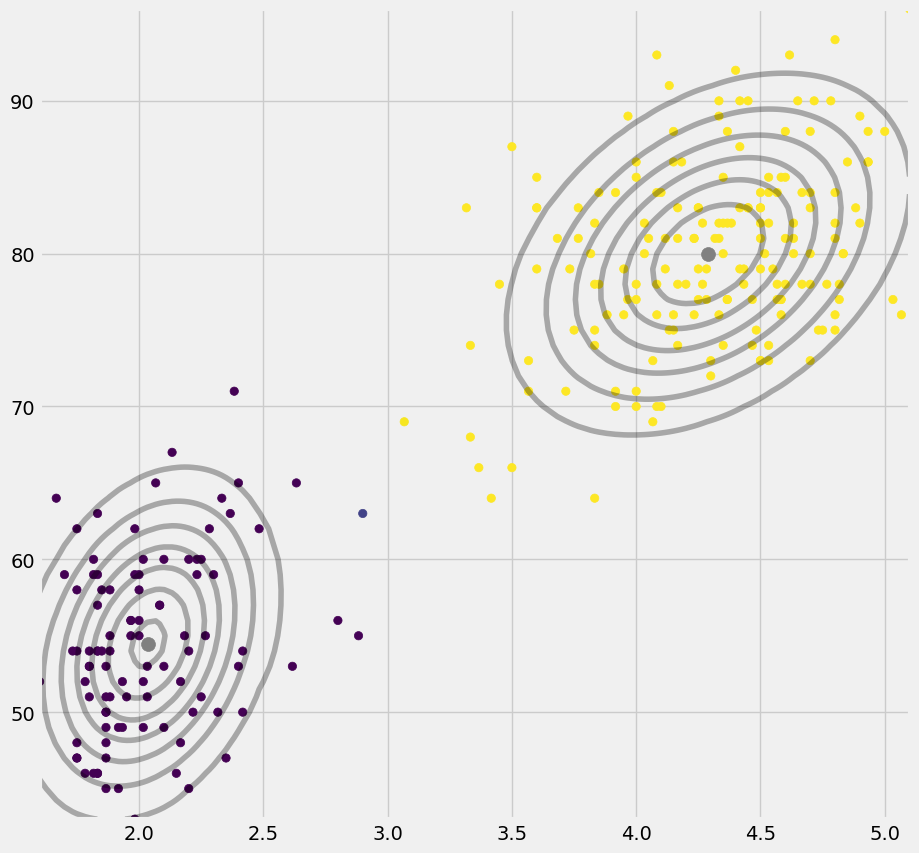

In [6]:
# Plot   
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

ax0.scatter(X[:,0],X[:,1], c=prediction[:,0], cmap = 'viridis')

x,y = np.meshgrid(np.sort(X[:,0]),np.sort(X[:,1]))
XY = np.array([x.flatten(),y.flatten()]).T

for m,c in zip(GMM.means_,GMM.covariances_):
    multi_normal = multivariate_normal(mean=m,cov=c)
    ax0.contour(np.sort(X[:,0]),np.sort(X[:,1]),multi_normal.pdf(XY).reshape(len(X),len(X)),colors='black',alpha=0.3)
    ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
    
plt.show()

We will print the data to have get a sense of what the data looks. 

In [7]:
print(X)

[[ 3.6   79.   ]
 [ 1.8   54.   ]
 [ 3.333 74.   ]
 [ 2.283 62.   ]
 [ 4.533 85.   ]
 [ 2.883 55.   ]
 [ 4.7   88.   ]
 [ 3.6   85.   ]
 [ 1.95  51.   ]
 [ 4.35  85.   ]
 [ 1.833 54.   ]
 [ 3.917 84.   ]
 [ 4.2   78.   ]
 [ 1.75  47.   ]
 [ 4.7   83.   ]
 [ 2.167 52.   ]
 [ 1.75  62.   ]
 [ 4.8   84.   ]
 [ 1.6   52.   ]
 [ 4.25  79.   ]
 [ 1.8   51.   ]
 [ 1.75  47.   ]
 [ 3.45  78.   ]
 [ 3.067 69.   ]
 [ 4.533 74.   ]
 [ 3.6   83.   ]
 [ 1.967 55.   ]
 [ 4.083 76.   ]
 [ 3.85  78.   ]
 [ 4.433 79.   ]
 [ 4.3   73.   ]
 [ 4.467 77.   ]
 [ 3.367 66.   ]
 [ 4.033 80.   ]
 [ 3.833 74.   ]
 [ 2.017 52.   ]
 [ 1.867 48.   ]
 [ 4.833 80.   ]
 [ 1.833 59.   ]
 [ 4.783 90.   ]
 [ 4.35  80.   ]
 [ 1.883 58.   ]
 [ 4.567 84.   ]
 [ 1.75  58.   ]
 [ 4.533 73.   ]
 [ 3.317 83.   ]
 [ 3.833 64.   ]
 [ 2.1   53.   ]
 [ 4.633 82.   ]
 [ 2.    59.   ]
 [ 4.8   75.   ]
 [ 4.716 90.   ]
 [ 1.833 54.   ]
 [ 4.833 80.   ]
 [ 1.733 54.   ]
 [ 4.883 83.   ]
 [ 3.717 71.   ]
 [ 1.667 64.   ]
 [ 4.567 77.  